<a href="https://colab.research.google.com/github/ramonfv/iniciacao-cientifica-BCI/blob/main/Aula_Pratica_3_e_4_Pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 1

Alunos:

Leonardo Castro Souza Marotta

Rafael Fernandes Almeira 

Ramon Fernandes Viana

Aula Prática 3 e 4 – Pré Processamento 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sp
import scipy.io as sio
from scipy.fft import fft
from scipy import signal
from scipy.fft import fft
import math 
from sklearn.cross_decomposition import CCA

In [ ]:
# O arquivo escolhido para download foi o S26
  mat = sio.loadmat('/content/S26.mat', verify_compressed_data_integrity=False)            
  data = np.array(mat['data'])
  data.shape


(64, 1500, 40, 6)

2) Escolha um indivíduo, uma frequência de estimulação e uma trial.

3) Inicialmente o sinal deve ser janelado. Gere uma matriz de dados V que contenha as
amostras do sinal EEG do indivíduo escolhido entre 0,5 ms e 5,5 ms. Ou seja, haverá uma
matriz de 64 eletrodos (canais) x 1250 amostra

In [ ]:
# o Indivíduo escolhido foi o mesmo da prática 1, que no caso é o 26 
# frequencia de 15hz e trial 3 
Matriz_V = data[:,125:1375,7,3];
Matriz_V.shape

(64, 1250)

In [ ]:
rows = len(Matriz_V);
cols = len(Matriz_V[0]);
print(rows);
print(cols);
V_filter= [[0 for i in range(cols)] for j in range(rows)];
print(len(V_filter));
print(len(V_filter[0]))
Fs = 250;

64
1250
64
1250


In [ ]:
def CAR(Matriz_V):
    V_aux = np.array(Matriz_V);
    for j in range(cols):
      for i in range(rows):
          mean = np.mean(V_aux[:,j]);
          V_filter[i][j] = V_aux[i,j] - mean;
    return V_filter;            
    
        

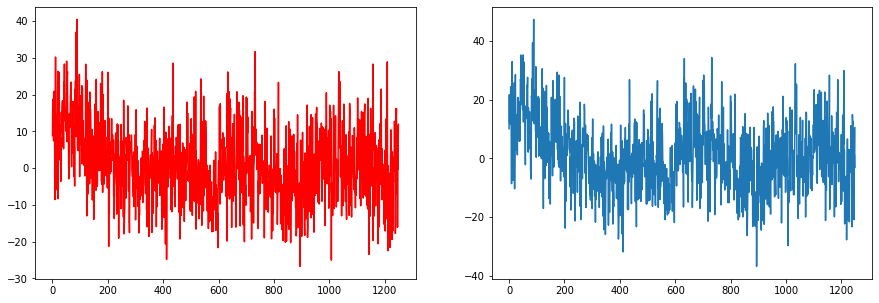

In [ ]:
#plt.plot(CAR(Matriz_V));
V_CAR = np.array(CAR(Matriz_V));
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(V_CAR[61][:],color='r')
plt.subplot(1,2,2)
plt.plot(Matriz_V[61,:])
plt.show
res_esp = Fs/1250
freq = np.arange(1250)*(res_esp)


<function matplotlib.pyplot.show>

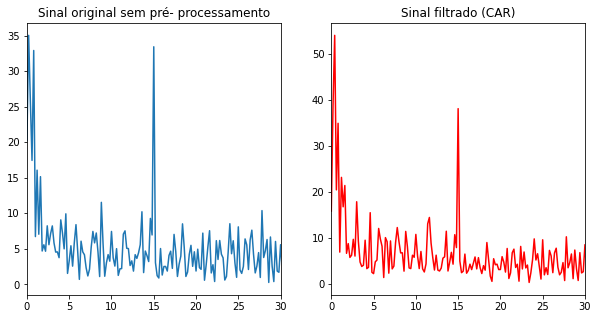

In [ ]:
x_fft = fft([V_CAR[61,:]])/len(V_CAR);
x_fft=x_fft.reshape(-1,)
V_fft = fft([Matriz_V[61,:]])/len(Matriz_V);
V_fft = V_fft.reshape(-1,)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(freq,np.abs(x_fft))
plt.title('Sinal original sem pré- processamento');
plt.xlim(0, 30)
plt.subplot(1,2,2)
plt.plot(freq,np.abs(V_fft),color='r')
plt.title('Sinal filtrado (CAR)');
plt.xlim(0, 30)
plt.show

In [ ]:
arr =np.array([[1,2],[3,5]])
print(arr)

[[1 2]
 [3 5]]


# Nova seção

# Aula prática 4 - pré-processamento

Objetivo:
- Compreender técnicas de pré-processamento.
- Iniciar a implementação de uma BCI – etapa de pré-processamento. 

1) Como continuidade da prática 3, empregando o mesmo sinal utilizado pelo grupo, faça:


a) Usando o script da filtragem CCA, plote o sinal no tempo e a magnitude da FFT para o
canal correspondente ao eletrodo Oz.


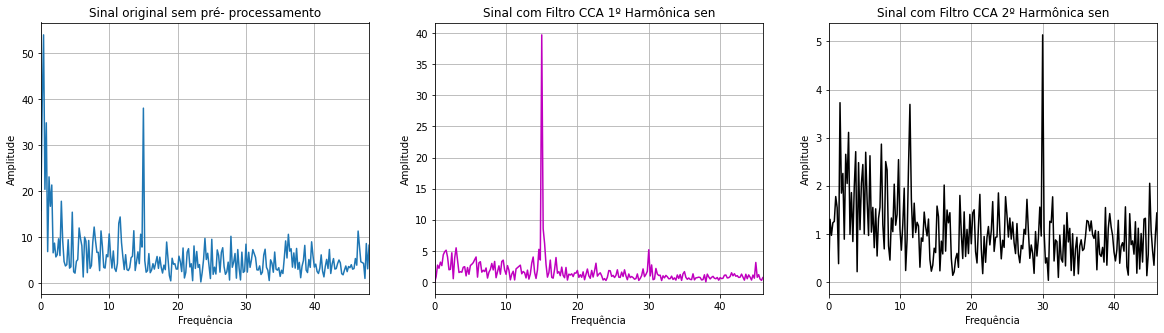

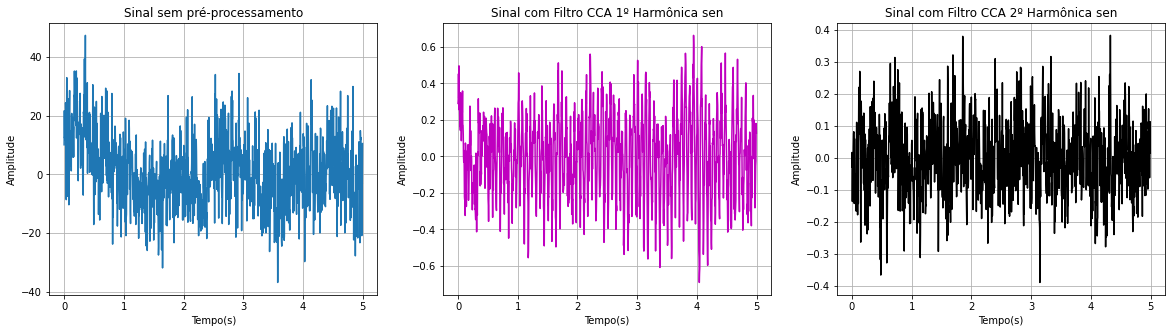

In [ ]:
# vetor de tempo
time = np.arange(1250)*1/Fs; 
# frequencia fundamental
f= 15;
# Sinal criado com as harmônicas
Y15 = np.array([np.sin(2*np.pi*f*time),np.cos(2*np.pi*f*time),np.sin(4*np.pi*f*time),np.cos(4*np.pi*f*time)]);
X = np.transpose(Matriz_V);
Y = np.transpose(Y15);
# filtragem com o método CCA
cca = CCA(n_components=4);
cca.fit(X, Y);
U, V = cca.transform(X, Y);
U = np.transpose(U);
# plot dos sinais no tempo e na frequência
Oz_fft_original = fft([Matriz_V[61,:]])/len(Matriz_V)
Oz_fft_original = Oz_fft_original.reshape(-1,)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(freq,np.abs(Oz_fft_original));
plt.title('Sinal original sem pré- processamento');
plt.xlim(0, 48)
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(1,3,2)
Oz_fft_cca = fft([U[0,:]])/len(U);
Oz_fft_cca = Oz_fft_cca.reshape(-1,)
plt.plot(freq,np.abs(Oz_fft_cca),color='m');
plt.title('Sinal com Filtro CCA 1º Harmônica sen');
plt.xlim(0, 46)
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(1,3,3)
Oz_fft_cca2 = fft([U[2,:]])/len(U);
Oz_fft_cca2 = Oz_fft_cca2.reshape(-1,)
plt.plot(freq,np.abs(Oz_fft_cca2),color='k');
plt.title('Sinal com Filtro CCA 2º Harmônica sen');
plt.xlim(0, 46)
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(time,Matriz_V[61,:]);
plt.title('Sinal sem pré-processamento');
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(1,3,2)
plt.plot(time,U[0,:],color='m');
plt.title('Sinal com Filtro CCA 1º Harmônica sen');
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(1,3,3)
plt.plot(time,U[2,:],color='k');
plt.title('Sinal com Filtro CCA 2º Harmônica sen');
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.grid()


O que é possível observar no tempo e na frequência em cada um dos gráficos obtidos?
Compare-os

Fazendo uma análise simples por insperção é possível perceber as diferenças dos sinais. Na frequência, é notória a diferença entre o sinal filtrado com o método CCA e o não filtrado, o ruído é atenuado e as características do sinal são destacadas. 

Foi escolhido a frequência de destaque de 15Hz, como é possível observar na figura que contém as frequências, que o bin desejado fica em destaque em relação ao sinal sem filtro e as demais harmônicas. 

Ao analisarmos o método CCA, o primeiro vetor de correlação canônica resultante, é associado ao maior coeficiente, e apresenta uma realçao sinal-ruído muito melhor.
Já para as demais harmônicas do CCA, a correlação entre elas é menor e por isso os bins desejados perdem seus destaques e o sinal não apresenta uma fluidez da primeira harmônica, em alguns casos, o sinal filtrado no bin fundamental é atenuado a um ponto em que é melhor visualizado no sinal sem o filtro.

Já no tempo, o que mais chama atenção é a atenuação da amplitude do sinal. Para extração de cacacterísticas a visualização no tempo não agrega tanto valor, no entanto, é possível registrar o deslocamento ao longo do tempo de coleta. Fazendo uma análise visual do sinal é possível observar que utilizando o filtro CCA houve uma filtragem e que o sinal filtrado aparenta ser mais compreenchido, detalhado e suave, isso em relação ao bin fundamental, este que concentra o maior número de informação relevante.

b) Com base nas análises realizadas considerando as filtragens CCA, MEC e CAR, qual
delas foi mais eficaz para o sinal escolhido pelo grupo? Justifique.


Certamente o mais eficaz, levando em consideração a base de dados escolhida,as análises no tempo e principalmente na frequência, foi o CCA. Na frequência a diferença foi a mais impressionante, o que faz toda a diferença para extrair as caraterísticas do sinal coletado na construção de uma BCI. 

Foi possível identificar que ao utilizarmos sinais BCI a etapa de pré-processamento deve levar em consideração cada sinal individualmente, pois cada aplicação de técnica ou uma simples filtragem aplicada pode deixar o mesmo inutilizável. Ao utilizarmos o filtro MEC seu sinal escolhido não houve essa extrema alteração na aplicação deste filtro, mas ao alterarmos a amostra foi possível identificar que neste caso especifico o sinal se perdeu, provando que a filtragem MEC não seria um pré-processamento valido para esta amostragem.

Em comparação com o filtro CAR, as diferenças para a amostra em questão não foram muito discrepantes, ainda que o CCA apresente um destaque maior para os bins e atenuação de ruído melhor. No tempo, a diferença entre os filtros é muito grande, pois, com a utilização do CCA o sinal filtrado carrega uma quantidade de detalhes muito mais fáceis de identificar.

Podemos afirmar que não há uma filtragem melhor do que a outra para esta etapa de préprocessamento, mas sim uma filtragem que se adequa melhor ao sinal em questão. Neste caso especifico, após os testes com ambas as técnicas de filtragem é possível afirmar que a filtragem CCA é a mais indicada para o sinal do individuo S26, devido ao fato de que a aplicação da filtragem MEC retorna como saída aproximadamente zero em todo período de tempo. 

In [ ]:
!pwd



In [ ]:

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended


In [ ]:
!jupyter nbconvert --to pdf Aula_Pratica_3_e_4_Pre_processamento.ipynb

[NbConvertApp] Converting notebook Aula_Pratica_3_e_4_Pre_processamento.ipynb to pdf
[NbConvertApp] Support files will be in Aula_Pratica_3_e_4_Pre_processamento_files/
[NbConvertApp] Making directory ./Aula_Pratica_3_e_4_Pre_processamento_files
[NbConvertApp] Making directory ./Aula_Pratica_3_e_4_Pre_processamento_files
[NbConvertApp] Making directory ./Aula_Pratica_3_e_4_Pre_processamento_files
[NbConvertApp] Making directory ./Aula_Pratica_3_e_4_Pre_processamento_files
[NbConvertApp] Writing 44551 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 257831 bytes to Aula_Pratica_3_e_4_Pre_processamento.pdf
